In [25]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
import tensorflow as tf
import os


In [26]:

base_dir = r"C:\Users\prava\Downloads\flowers"

img_size = 224
batch = 64

In [27]:

train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)


train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [29]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
epochs=20
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.3544 - loss: 1.5011 - val_accuracy: 0.5360 - val_loss: 1.1623
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5528 - loss: 1.1192 - val_accuracy: 0.5930 - val_loss: 1.0673
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6190 - loss: 0.9957 - val_accuracy: 0.5791 - val_loss: 1.0741
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6240 - loss: 0.9664 - val_accuracy: 0.6209 - val_loss: 0.9588
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6257 - loss: 0.9494 - val_accuracy: 0.6337 - val_loss: 0.9349
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6679 - loss: 0.8508 - val_accuracy: 0.6547 - val_loss: 0.8996
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6286 - loss: 0.9775 - val_accuracy: 0.5930 - val_loss: 1.0432
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6630 - loss: 0.8934 - val_accuracy: 0.6779 - val_loss

In [37]:
from tensorflow.keras.models import load_model

model.save("model.keras")

savedModel = load_model("model.keras")



In [38]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [40]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(224,224))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    flower_names = ['Daisy','Danelion','Rose','sunflower', 'tulip']
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [43]:
classify_images(r"daisy.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


'The Image belongs to Daisy with a score of 40.46096'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 9.6290926e-24 0.0000000e+00]]
Daisy


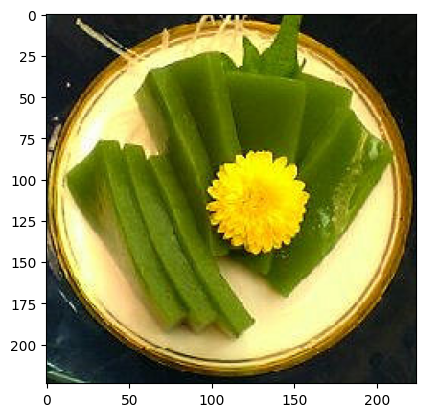

In [45]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img(r"dandelion.jpg",target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i]) # Make sure this line is indented with four spaces
    break
